## Evaluation with plots


In [1]:
import numpy as np
from texttable import Texttable
import latextable
import matplotlib.pyplot as plt
from glob import glob

## Semagram evaluation

#### Hypernym relation

In [2]:
# Load the results

models = ["bert", "electra"]
kb = "semagram"


precisions_models = {}
recall_models = {}
mrr_models = {}

for model in models:
    main_folder = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}'

    precisions = []
    recalls = []
    mrrs = []

    for file in glob(main_folder+'/**/*.txt'):
        print(f'File: {file}')
        
        #print(file.split("\\")[-2])
        type_relation = file.split("\\")[-2]


        with open(file, 'r', encoding="utf8") as f:
            lines = f.readlines()

            precs_text = lines[:4]
            
            prec_rel_k = []
            for line in precs_text:
                split = line.strip().split(": ")
                prec_v = round(float(split[1]), 2)
                prec_rel_k.append(prec_v)


            recalls_text = lines[6:10]

            recall_rel_k = []
            for line in recalls_text:
                split = line.strip().split(": ")
                recall_v = round(float(split[1]), 2)
                recall_rel_k.append(recall_v)

            mrr_text = lines[18] # line is mrr
            split = mrr_text.strip().split(": ")
            mrr = round(float(split[1]), 2)


        precisions.append((type_relation, prec_rel_k))

        recalls.append((type_relation, recall_rel_k))

        mrrs.append((type_relation, mrr))

    precisions_models[model] = precisions
    recall_models[model] = recalls
    mrr_models[model] = mrrs


print(precisions_models)
print(recall_models)
print(mrr_models)



File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\is_a\masked_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\specific_term\masked_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\such_as\masked_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/semagram\is_a\masked_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/semagram\specific_term\masked_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/semagram\such_as\masked_concept_hyper_20.txt
{'bert': [('is_a', [0.14, 0.24, 0.35, 0.41]), ('specific_term', [0.14, 0.25, 0.36, 0.42]), ('such_as', [0.17, 0.26, 0.38, 0.44])], 'electra': [('is_a', [0.06, 0.08, 0.15, 0.23]), ('specific_term', [0.01, 0.03, 0.1, 0.18]), ('such_as', [0.09, 0.14, 0.25, 0.34])]}
{'bert': [('is_a', [0.08, 0.16, 0.28, 0.37]), ('specific_term', [0.0

### PRECISION@K

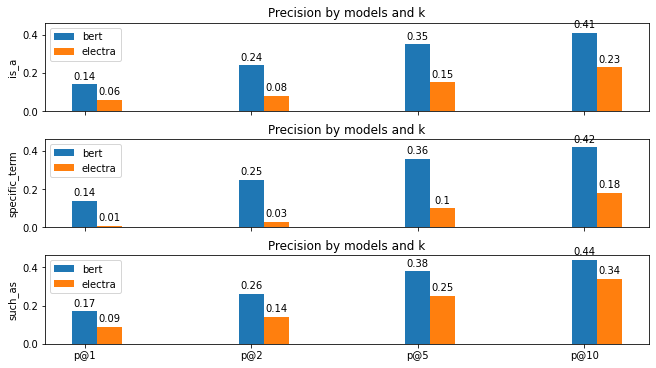

In [3]:
#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(18, 10))

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(9, 5))

width = 0.15  # the width of the bars

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

labels = ("p@1", "p@2", "p@5", "p@10") # ci sono i valori di k utilizzati

x = np.arange(len(labels))  # the label of precision

for (i, j) in enumerate([0, 1, 2]):
    

    rects1 = axes[j].bar(x, precisions_models[models[0]][i][1], width, label=models[0])
    axes[j].bar_label(rects1, padding=3)
    
    rects2 = axes[j].bar(x + width, precisions_models[models[1]][i][1], width, label=models[1])
    axes[j].bar_label(rects2, padding=3)

    #rects3 = axes[j].bar(x + 2*width, precisions_models[models[2]][i][1], width, label=models[2])
    #axes[j].bar_label(rects3, padding=3)

    #rects4 = axes[j].bar(x + 3*width, precisions_models[models[3]][i][1], width, label=models[3])
    #axes[j].bar_label(rects4, padding=3)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[j].set_ylabel(precisions_models[models[0]][i][0])
    axes[j].set_title('Precision by models and k')
    axes[j].set_xticks(x, labels)
    axes[j].legend()


plt.show()

### RECALL@K

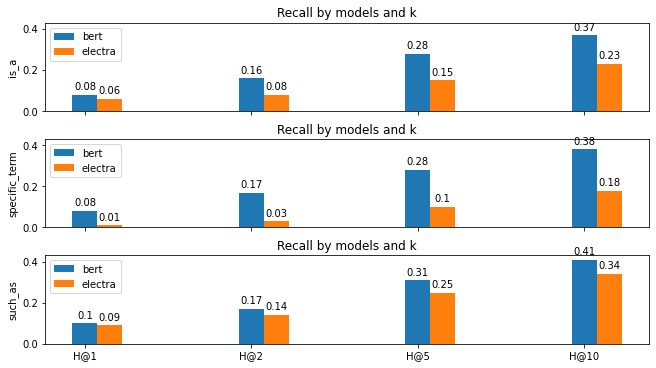

In [4]:
#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(18, 10))

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(9, 5))

width = 0.15  # the width of the bars

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

labels = ("H@1", "H@2", "H@5", "H@10") # ci sono i valori di k utilizzati

x = np.arange(len(labels))  # the label of precision

for (i, j) in enumerate([0, 1, 2]):    

    rects1 = axes[j].bar(x, recall_models[models[0]][i][1], width, label=models[0])
    axes[j].bar_label(rects1, padding=3)
    
    rects2 = axes[j].bar(x + width, precisions_models[models[1]][i][1], width, label=models[1])
    axes[j].bar_label(rects2, padding=3)

    #rects3 = axes[j].bar(x + 2*width, precisions_models[models[2]][i][1], width, label=models[2])
    #axes[j].bar_label(rects3, padding=3)

    #rects4 = axes[j, k].bar(x + 3*width, precisions_models[models[3]][i][1], width, label=models[3])
    #axes[j, k].bar_label(rects4, padding=3)
    


    #rects1 = ax.bar(x - width/2, men_means, width, label='')
    #rects2 = ax.bar(x + width/2, women_means, width, label='')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[j].set_ylabel(recall_models[models[0]][i][0])
    axes[j].set_title('Recall by models and k')
    axes[j].set_xticks(x, labels)
    axes[j].legend()


plt.show()

### MRR

In [5]:
table = Texttable()
table.set_cols_align(["m", "m", "m"])
table.add_row(["Experiment", "MRR-BERT", "MRR-ELECTRA"])

for (experiment, value_bert), (_, value_electra) in zip(mrr_models["bert"], mrr_models["electra"]):
    table.add_row([experiment, value_bert, value_electra])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------------+----------+-------------+
| Experiment    | MRR-BERT | MRR-ELECTRA |
+---------------+----------+-------------+
| is_a          | 0.150    | 0.070       |
+---------------+----------+-------------+
| specific_term | 0.170    | 0.050       |
+---------------+----------+-------------+
| such_as       | 0.140    | 0.110       |
+---------------+----------+-------------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|m|m|m|}
			\hline
			 \\
			\hline
			Experiment & MRR-BERT & MRR-ELECTRA \\
			\hline
			is_a & 0.150 & 0.070 \\
			\hline
			specific_term & 0.170 & 0.050 \\
			\hline
			such_as & 0.140 & 0.110 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


#### Other relations

Activity - Behavior - Color_Pattern - Consistency - Content - Efficiency - How_to_use - Hyponym - Material
Movement - Part - Product - Purpose - Shape - Size - Supply - Taste - Time

In [6]:
# Load the results

models = ["bert", "electra"]
kb = "semagram"

relations = ["activity", "behavior", "color_pattern", "consistency", "content", "efficiency", "how_to_use", "hypo", "material", "movement", "part", "product", "purpose", "shape", \
             "size", "supply", "taste", "time"]

precisions_models = {}
recall_models = {}
mrr_models = {}

for model in models:
    main_folder = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}'

    precisions = []
    recalls = []
    mrrs = []

    for file in glob(main_folder+'/*.txt'):
        print(f'File: {file}')

        rel = ""

        for relation in relations:
            if relation in file:
                print(f'Relation: {relation}')
                rel = relation


        with open(file, 'r', encoding="utf8") as f:
            lines = f.readlines()

            precs_text = lines[:4]
            
            prec_rel_k = []
            for line in precs_text:
                split = line.strip().split(": ")
                prec_v = round(float(split[1]), 2)
                prec_rel_k.append(prec_v)


            recalls_text = lines[6:10]

            recall_rel_k = []
            for line in recalls_text:
                split = line.strip().split(": ")
                recall_v = round(float(split[1]), 2)
                recall_rel_k.append(recall_v)

            mrr_text = lines[18] # line is mrr
            split = mrr_text.strip().split(": ")
            mrr = round(float(split[1]), 2)


        precisions.append((rel, prec_rel_k))

        recalls.append((rel, recall_rel_k))

        mrrs.append((rel,mrr))

    precisions_models[model] = precisions
    recall_models[model] = recalls
    mrr_models[model] = mrrs


print(precisions_models)
print(recall_models)
print(mrr_models)



File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_activity_20.txt
Relation: activity
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_behavior_20.txt
Relation: behavior
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_color_pattern_20.txt
Relation: color_pattern
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_consistency_20.txt
Relation: consistency
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_content_20.txt
Relation: content
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_efficiency_20.txt
Relation: efficiency
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_how_to_use_20.txt
Relation: how_to_use
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/semagram\masked_concept_hypo_20.txt
Relation: hypo
Fi

### PRECISION@k


In [7]:
table = Texttable()
num_cols = len(relations) + 1
table.set_cols_align(["l"] * num_cols)
header = relations.copy()
header.insert(0, "Model")
table.add_row(header)

for model in models:
    
    precs = precisions_models[model]

    row = []

    for prec in precs:
        row.append(prec[1][2]) # TODO: mettere a 10
    
    row.insert(0, model.upper())
    table.add_row(row)


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+----+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| Mo | ac | be | c | c | c | e | h | h | m | m | p | p | p | s | s | s | t | t |
| de | ti | ha | o | o | o | f | o | y | a | o | a | r | u | h | i | u | a | i |
| l  | vi | vi | l | n | n | f | w | p | t | v | r | o | r | a | z | p | s | m |
|    | ty | or | o | s | t | i | _ | o | e | e | t | d | p | p | e | p | t | e |
|    |    |    | r | i | e | c | t |   | r | m |   | u | o | e |   | l | e |   |
|    |    |    | _ | s | n | i | o |   | i | e |   | c | s |   |   | y |   |   |
|    |    |    | p | t | t | e | _ |   | a | n |   | t | e |   |   |   |   |   |
|    |    |    | a | e |   | n | u |   | l | t |   |   |   |   |   |   |   |   |
|    |    |    | t | n |   | c | s |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | t | c |   | y | e |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | e | y |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | r |   |   |

### RECALL@k

In [8]:
table = Texttable()
table.set_cols_align(["l"] * num_cols)
table.add_row(header)

for model in models:
    
    recalls = recall_models[model]

    row = []

    for recall in recalls:
        row.append(recall[1][2])

    row.insert(0, model.upper())
    table.add_row(row)


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+----+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| Mo | ac | be | c | c | c | e | h | h | m | m | p | p | p | s | s | s | t | t |
| de | ti | ha | o | o | o | f | o | y | a | o | a | r | u | h | i | u | a | i |
| l  | vi | vi | l | n | n | f | w | p | t | v | r | o | r | a | z | p | s | m |
|    | ty | or | o | s | t | i | _ | o | e | e | t | d | p | p | e | p | t | e |
|    |    |    | r | i | e | c | t |   | r | m |   | u | o | e |   | l | e |   |
|    |    |    | _ | s | n | i | o |   | i | e |   | c | s |   |   | y |   |   |
|    |    |    | p | t | t | e | _ |   | a | n |   | t | e |   |   |   |   |   |
|    |    |    | a | e |   | n | u |   | l | t |   |   |   |   |   |   |   |   |
|    |    |    | t | n |   | c | s |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | t | c |   | y | e |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | e | y |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | r |   |   |

### MRR

In [9]:
table = Texttable()
table.set_cols_align(["l"] * num_cols)
table.add_row(header)

for model in models:
    
    mrrs = mrr_models[model]

    row = []

    for mrr in mrrs:
        row.append(mrr[1])
    
    row.insert(0, model.upper())
    table.add_row(row)


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+----+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| Mo | ac | be | c | c | c | e | h | h | m | m | p | p | p | s | s | s | t | t |
| de | ti | ha | o | o | o | f | o | y | a | o | a | r | u | h | i | u | a | i |
| l  | vi | vi | l | n | n | f | w | p | t | v | r | o | r | a | z | p | s | m |
|    | ty | or | o | s | t | i | _ | o | e | e | t | d | p | p | e | p | t | e |
|    |    |    | r | i | e | c | t |   | r | m |   | u | o | e |   | l | e |   |
|    |    |    | _ | s | n | i | o |   | i | e |   | c | s |   |   | y |   |   |
|    |    |    | p | t | t | e | _ |   | a | n |   | t | e |   |   |   |   |   |
|    |    |    | a | e |   | n | u |   | l | t |   |   |   |   |   |   |   |   |
|    |    |    | t | n |   | c | s |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | t | c |   | y | e |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | e | y |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
|    |    |    | r |   |   |